<a href="https://colab.research.google.com/github/Stevebankz/Accident-Prediction/blob/main/Accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data contains information about accidents, including details such as the date and time of the accident, highway and route names, milestone markers, travel direction, weather conditions, asset loss, casualties, cause of the accident, geographical coordinates, and more.

Based on the structure and types of data available, here are some visualization ideas we could consider:

Time Analysis:
Number of accidents over time (monthly, weekly, daily).
Time of day when accidents are most frequent.

Geographical Analysis:
A map highlighting accident locations.
Heatmap of accidents to show concentration areas.

Categorical Analysis:
Distribution of accidents by HighwayName or RouteName.
Weather conditions under which most accidents occur.

Cause Analysis:
Frequency of accidents by their cause.

Casualty Analysis:
Number of wounded or dead by gender.
Accidents resulting in asset loss.

In [2]:
import pandas as pd

# Load the Excel file
file_path = '/content/อุบัติเหตุ.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,TransactionDateTime,HighwayName,RouteName,Milestone,TravelDirection,PlazaID,Weather,AssetLostItem,AssetLostCost,WoundedMaleAmount,...,DeadMaleAmount,DeadFemaleAmount,BarrierLaneCrashFlag,Cause,Latitude,Longitude,วัน/เดือน/ปีที่เกิดอุบัติเหตุ,เวลาเกิดอุบัติเหตุ,ปีที่เกิดอุบัติเหตุ,เดือนที่เกิดอุบัติเหตุ
0,2023-11-29 16:47:47 UTC,S1,S1,2000.0,A,NaN,ปกติ,0,0,0,...,0,0,N,เปลี่ยนช่องทางกระทันหัน,13.691775,100.600818,2023-11-29,16:47:47,2023,Nov
1,2023-11-22 21:23:23 UTC,S1,S1,4100.0,B,NaN,ปกติ,1,0,1,...,0,0,N,หลับใน,13.673679,100.606054,2023-11-22,21:23:23,2023,Nov
2,2023-11-22 01:25:25 UTC,S1,S1,4200.0,B,NaN,ปกติ,0,0,0,...,0,0,N,ละสายตาจากการขับขี่,13.673217,100.606882,2023-11-22,01:25:25,2023,Nov
3,2023-11-12 09:19:19 UTC,S1,S1,3500.0,B,NaN,ปกติ,0,0,0,...,0,0,N,โรคประจำตัวกำเริบ,13.678358,100.603695,2023-11-12,09:19:19,2023,Nov
4,2024-01-31 19:44:44 UTC,บูรพาวิถี,บางนา-ชลบุรี,50000.0,A,NaN,ปกติ,0,0,1,...,0,0,N,ยางแตก,13.490471,101.005631,2024-01-31,19:44:44,2024,Jan


***Monthly Accident Analysis***

<ipython-input-3-47840c6336a0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values, palette='viridis')


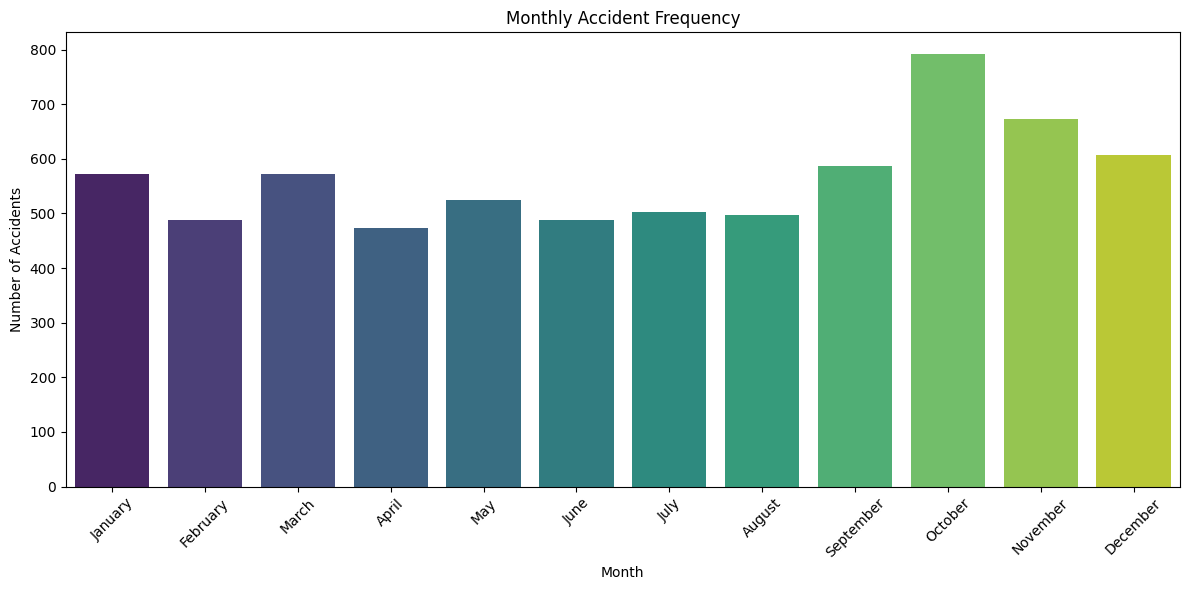

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TransactionDateTime' to datetime format
data['TransactionDateTime'] = pd.to_datetime(data['TransactionDateTime'])

# Extract month and hour from 'TransactionDateTime'
data['Month'] = data['TransactionDateTime'].dt.month_name()
data['Hour'] = data['TransactionDateTime'].dt.hour

# Monthly Accident Frequency
monthly_accidents = data['Month'].value_counts().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Monthly Accident Frequency')
plt.tight_layout()
plt.show()


***daily accident frequency***

<ipython-input-4-451562bc9aaf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_accidents.index, y=daily_accidents.values, palette='coolwarm')


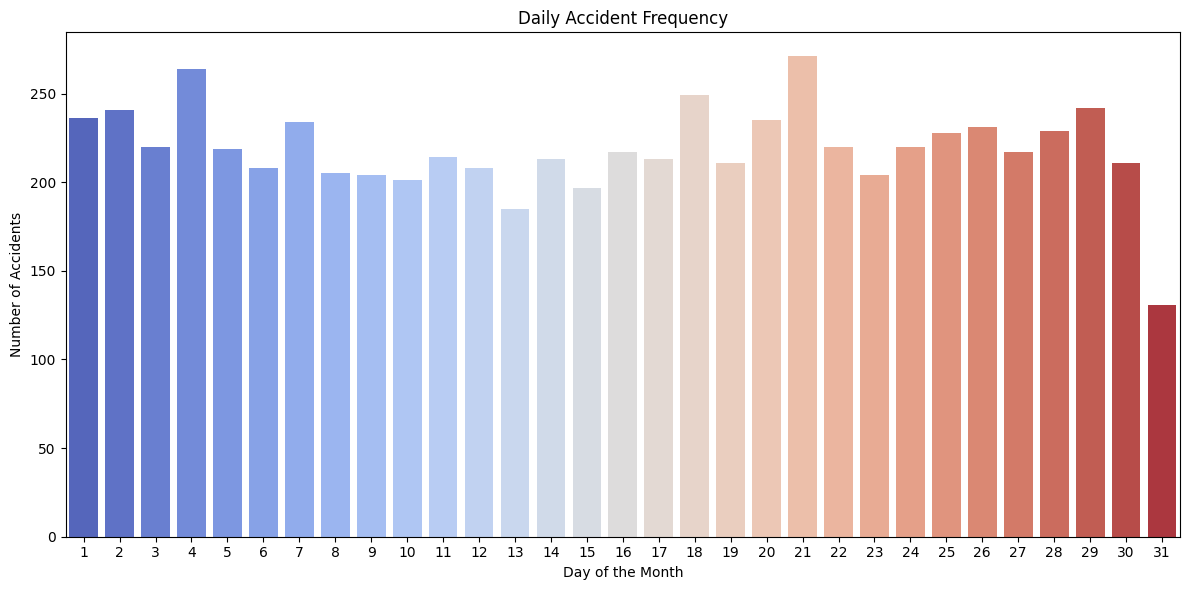

In [4]:
# Daily Accident Frequency
data['Day'] = data['TransactionDateTime'].dt.day
daily_accidents = data['Day'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_accidents.index, y=daily_accidents.values, palette='coolwarm')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Accidents')
plt.title('Daily Accident Frequency')
plt.tight_layout()
plt.show()


***hourly frequency of accidents***

<ipython-input-5-42fba41f074f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette='mako')


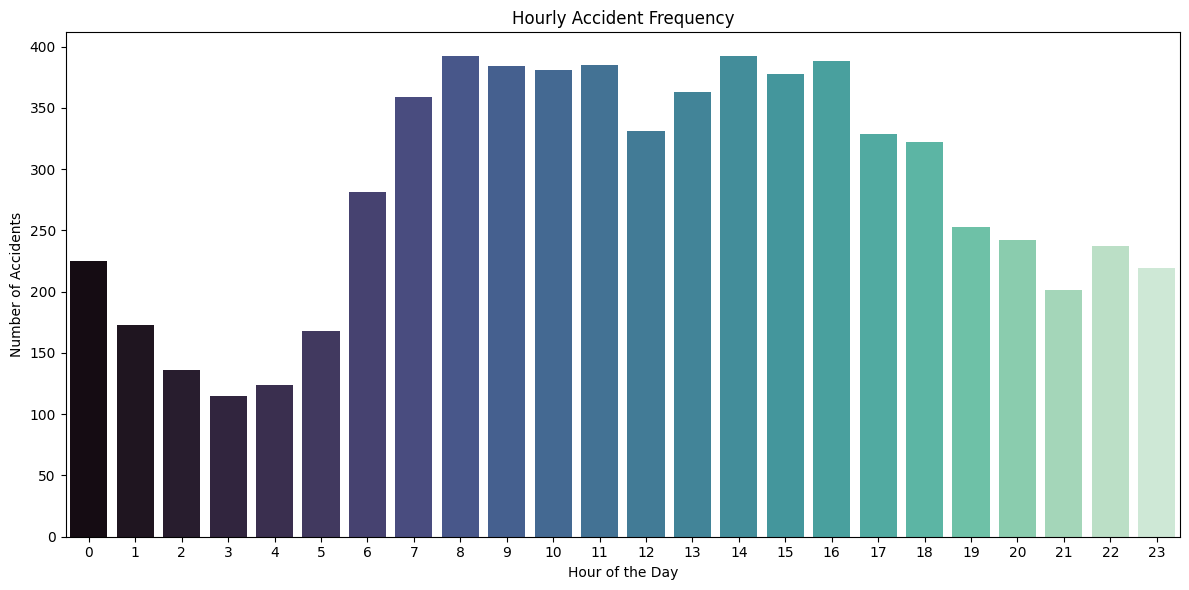

In [5]:
# Hourly Accident Frequency
hourly_accidents = data['Hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette='mako')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Hourly Accident Frequency')
plt.tight_layout()
plt.show()


For the geographical analysis, we'll focus on visualizing the accident locations to understand where accidents are most concentrated. This analysis involves creating a map that highlights these locations. Given the data includes latitude and longitude coordinates for each accident, we can plot these points on a map.

In [10]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the data
file_path = '/content/อุบัติเหตุ.xlsx'
data = pd.read_excel(file_path)

# Remove rows with NaN values in 'Latitude' and 'Longitude'
cleaned_data = data.dropna(subset=['Latitude', 'Longitude'])

# Create a base map
map_center = [cleaned_data['Latitude'].mean(), cleaned_data['Longitude'].mean()]
m_direct = folium.Map(location=map_center, zoom_start=10, tiles='OpenStreetMap')

# Add accident locations as heat points on the cleaned data
heat_data_clean = [[row['Latitude'], row['Longitude']] for index, row in cleaned_data.iterrows()]
HeatMap(heat_data_clean).add_to(m_direct)

m_direct


For the categorical analysis, we can explore the distribution of accidents across different categories present in the dataset, such as:

HighwayName or RouteName: To see which routes have the most accidents.
Weather Conditions: To understand the impact of weather on accident occurrences.

<ipython-input-11-0303ab2aa927>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highway_accidents.values, y=highway_accidents.index, palette='tab10')
<ipython-input-11-0303ab2aa927>:10: UserWarning: Glyph 3624 (\N{THAI CHARACTER SO SALA}) missing from current font.
  plt.tight_layout()
<ipython-input-11-0303ab2aa927>:10: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  plt.tight_layout()
<ipython-input-11-0303ab2aa927>:10: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from current font.
  plt.tight_layout()
<ipython-input-11-0303ab2aa927>:10: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from current font.
  plt.tight_layout()
<ipython-input-11-0303ab2aa927>:10: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  plt.tight_layout()
<ipyt

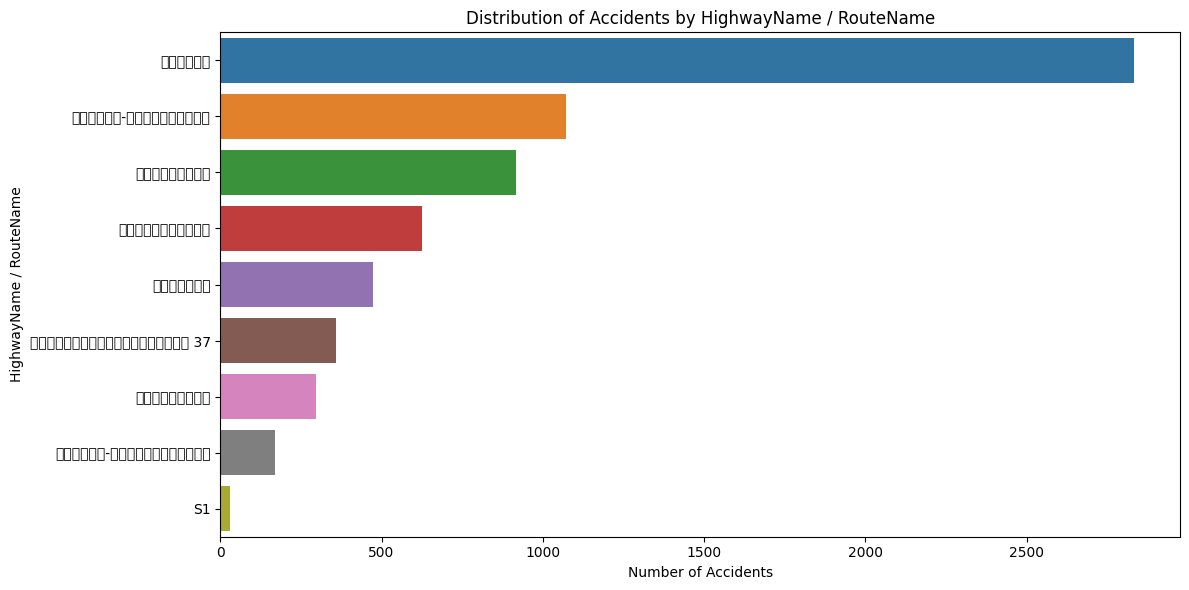

In [11]:
# Distribution of accidents by HighwayName or RouteName
highway_accidents = data['HighwayName'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=highway_accidents.values, y=highway_accidents.index, palette='tab10')
plt.xlabel('Number of Accidents')
plt.ylabel('HighwayName / RouteName')
plt.title('Distribution of Accidents by HighwayName / RouteName')
plt.tight_layout()
plt.show()


<ipython-input-12-1feb615db748>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_accidents.values, y=weather_accidents.index, palette='Set2')
<ipython-input-12-1feb615db748>:10: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  plt.tight_layout()
<ipython-input-12-1feb615db748>:10: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  plt.tight_layout()
<ipython-input-12-1feb615db748>:10: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from current font.
  plt.tight_layout()
<ipython-input-12-1feb615db748>:10: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.
  plt.tight_layout()
<ipython-input-12-1feb615db748>:10: UserWarning: Glyph 3613 (\N{THAI CHARACTER FO FA}) missing from current font.
  plt.tight_layout()
<ipython-input-12-

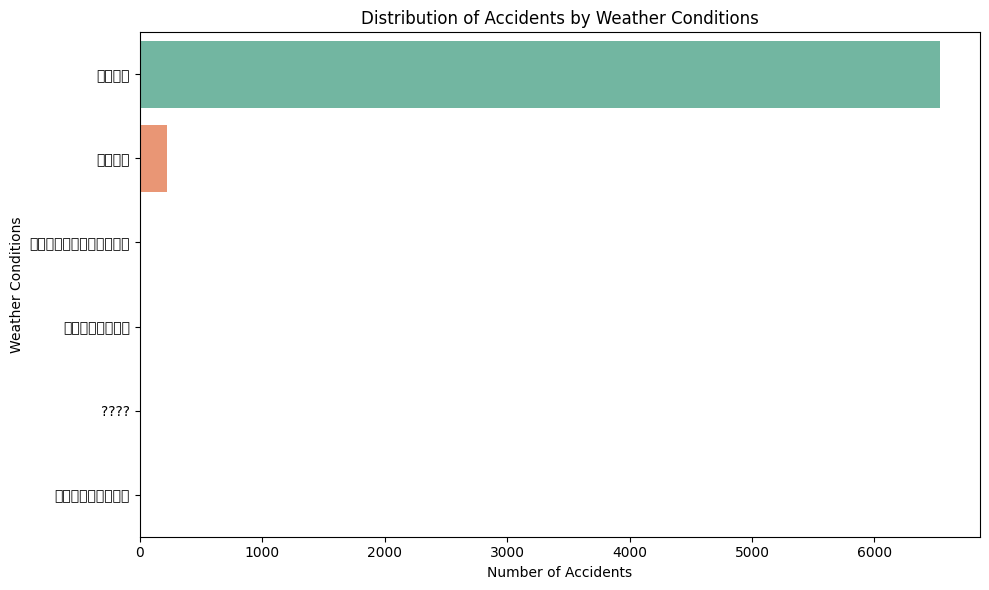

In [12]:
# Distribution of accidents by Weather Conditions
weather_accidents = data['Weather'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_accidents.values, y=weather_accidents.index, palette='Set2')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.title('Distribution of Accidents by Weather Conditions')
plt.tight_layout()
plt.show()


For the cause analysis, we'll explore how the frequency of accidents varies by their reported causes. This can help identify the most common reasons behind accidents, which could be vital for preventive measures and safety campaigns. a visualization to show the distribution of accidents by their causes.

<ipython-input-13-75f7d8907dbf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_accidents.values, y=cause_accidents.index, palette='rocket')
<ipython-input-13-75f7d8907dbf>:10: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from current font.
  plt.tight_layout()
<ipython-input-13-75f7d8907dbf>:10: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from current font.
  plt.tight_layout()
<ipython-input-13-75f7d8907dbf>:10: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from current font.
  plt.tight_layout()
<ipython-input-13-75f7d8907dbf>:10: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  plt.tight_layout()
<ipython-input-13-75f7d8907dbf>:10: UserWarning: Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from current font.
  plt.tight_layout()
<ipyt

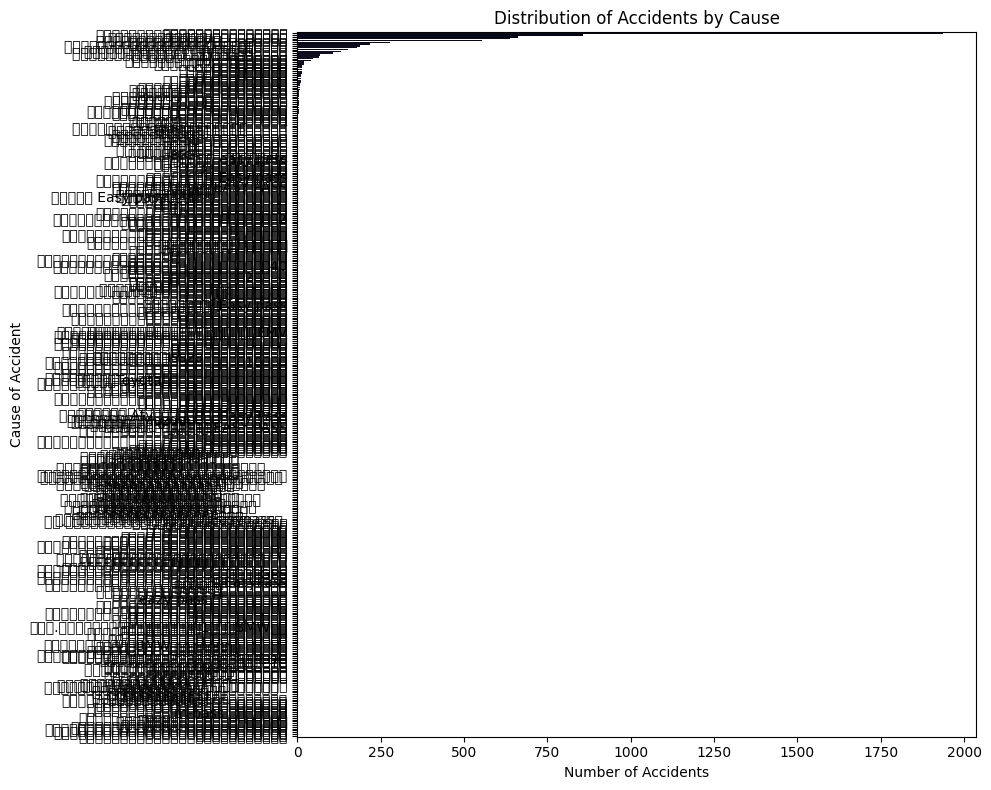

In [13]:
# Distribution of accidents by Cause
cause_accidents = data['Cause'].value_counts()

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=cause_accidents.values, y=cause_accidents.index, palette='rocket')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause of Accident')
plt.title('Distribution of Accidents by Cause')
plt.tight_layout()
plt.show()


For the casualty analysis, we'll examine the data related to the number of wounded and dead, segmented by gender. This can provide insights into the impact of accidents on different demographics. We'll create visualizations to show:

The number of wounded males and females.
The number of dead males and females.

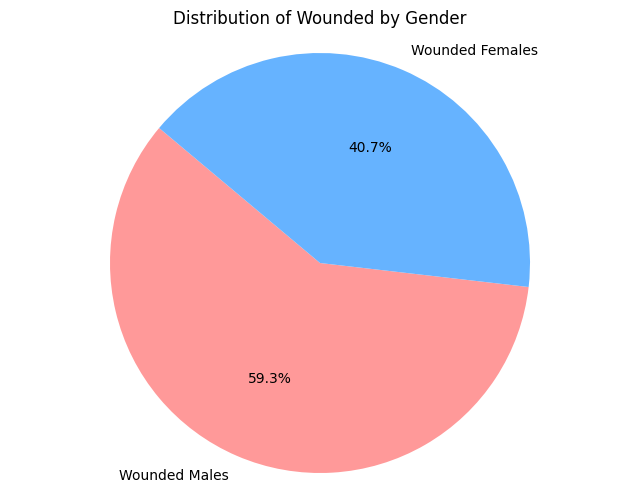

In [14]:
# Summing up the number of wounded males and females
wounded_males = data['WoundedMaleAmount'].sum()
wounded_females = data['WoundedFemaleAmount'].sum()

# Plotting the wounded data
labels = ['Wounded Males', 'Wounded Females']
sizes = [wounded_males, wounded_females]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Wounded by Gender')
plt.show()


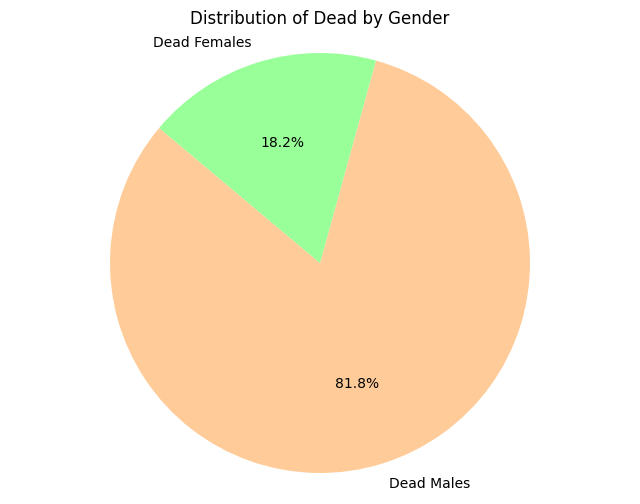

In [15]:
# Summing up the number of dead males and females
dead_males = data['DeadMaleAmount'].sum()
dead_females = data['DeadFemaleAmount'].sum()

# Plotting the dead data
labels_dead = ['Dead Males', 'Dead Females']
sizes_dead = [dead_males, dead_females]
colors_dead = ['#ffcc99','#99ff99']

plt.figure(figsize=(8, 6))
plt.pie(sizes_dead, labels=labels_dead, colors=colors_dead, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Dead by Gender')
plt.show()
